# Projeto final EBAC
Aqui você verá todos os meus projetos de Data Science divididos em grupos com as habilidades necessárias para obter os melhores Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Adige/main/image/Group.png" alt="capa">

---

# **Bem-Vindo(a)!** • Veja o que eu fiz de melhor com cientista de dados
**+ 18** Projetos 
#### [Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

Vamos explorar dados de crédito e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

#### **Análise Exploratória**

<ol type="1">
  <li>Carregamento dos dados e entendimento do contexto</li>
</ol>

- `Variáveis do Dataset`

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

### Vamos começar a análise

In [21]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Carregando os dados

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/EBAC/credito.csv', na_values='na')

### Estrutura dos dados

In [23]:
linhas, colunas = df.shape
print(f'Temos {linhas} linhas e {colunas} colunas.')

Temos 10127 linhas e 16 colunas.


In [24]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

In [25]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### Schema

 - Colunas e seus respectivos tipos de dados.

In [26]:
def guida(data_frame):
    righe, qnt_colonne = data_frame.shape
    sequenza = list(range(qnt_colonne + 1))
    sequenza = sequenza[1:]

    colonne = data_frame.columns.to_list()
    types_list = [str(type(data_frame[col][0])).split("'")[1] for col in data_frame.columns]
    lista_categorie = [data_frame[col].nunique() for col in data_frame.columns]

    elementi_nulli = data_frame.isnull().sum()
    elementi_nulli = elementi_nulli.to_list()

    percentuale_dati_nulli = round((data_frame.isnull().sum() / righe) * 100)
    percentuale_dati_nulli = percentuale_dati_nulli.to_list()

    data = pd.DataFrame({'Nome': colonne, 
                         'Tipo': types_list, 
                         'qunt_categorie': lista_categorie,
                         'Dati nulli' : elementi_nulli,
                         'Dati nulli %' : percentuale_dati_nulli}, index=sequenza)
    
    # Intestazioni
    print('Teabella Esplorativa')
    print(f'In questi dati abbiamo {righe} righe e {qnt_colonne} colonne.')
    
    return data

guida(df)

Teabella Esplorativa
In questi dati abbiamo 10127 righe e 16 colonne.


,Nome,Tipo,qunt_categorie,Dati nulli,Dati nulli %
1,id,numpy.int64,10127,0,0.0
2,default,numpy.int64,2,0,0.0
3,idade,numpy.int64,45,0,0.0
4,sexo,str,2,0,0.0
5,dependentes,numpy.int64,6,0,0.0
6,escolaridade,str,5,1519,15.0
7,estado_civil,str,3,749,7.0
8,salario_anual,str,5,1112,11.0
9,tipo_cartao,str,4,0,0.0
10,meses_de_relacionamento,numpy.int64,44,0,0.0


### Tratamendo dos dados

- As colunas

In [27]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [28]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn) # Apply una funzione in una colonna
df['limite_credito'] = df['limite_credito'].apply(fn)

guida_df = guida(df)
guida_df[['Nome', 'Tipo']]

Teabella Esplorativa
In questi dati abbiamo 10127 righe e 16 colonne.


,Nome,Tipo
1,id,numpy.int64
2,default,numpy.int64
3,idade,numpy.int64
4,sexo,str
5,dependentes,numpy.int64
6,escolaridade,str
7,estado_civil,str
8,salario_anual,str
9,tipo_cartao,str
10,meses_de_relacionamento,numpy.int64


- Dados faltantes

In [29]:
df.dropna(inplace=True)

In [30]:
guida_df = guida(df)
guida_df[['Nome', 'Dati nulli %']]

Teabella Esplorativa
In questi dati abbiamo 7081 righe e 16 colonne.


,Nome,Dati nulli %
1,id,0.0
2,default,0.0
3,idade,0.0
4,sexo,0.0
5,dependentes,0.0
6,escolaridade,0.0
7,estado_civil,0.0
8,salario_anual,0.0
9,tipo_cartao,0.0
10,meses_de_relacionamento,0.0


### Atributos

 - Atributos **categóricos**.

In [31]:
df_categoricos = df.select_dtypes('object')
df_categoricos

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue
...,...,...,...,...,...
10120,M,ensino medio,solteiro,$60K - $80K,blue
10121,F,mestrado,solteiro,menos que $40K,blue
10122,M,mestrado,solteiro,$40K - $60K,blue
10124,F,ensino medio,casado,menos que $40K,blue


In [32]:
df_categoricos.describe().transpose() # freq / count = %

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='salario_anual', ylabel='count'>

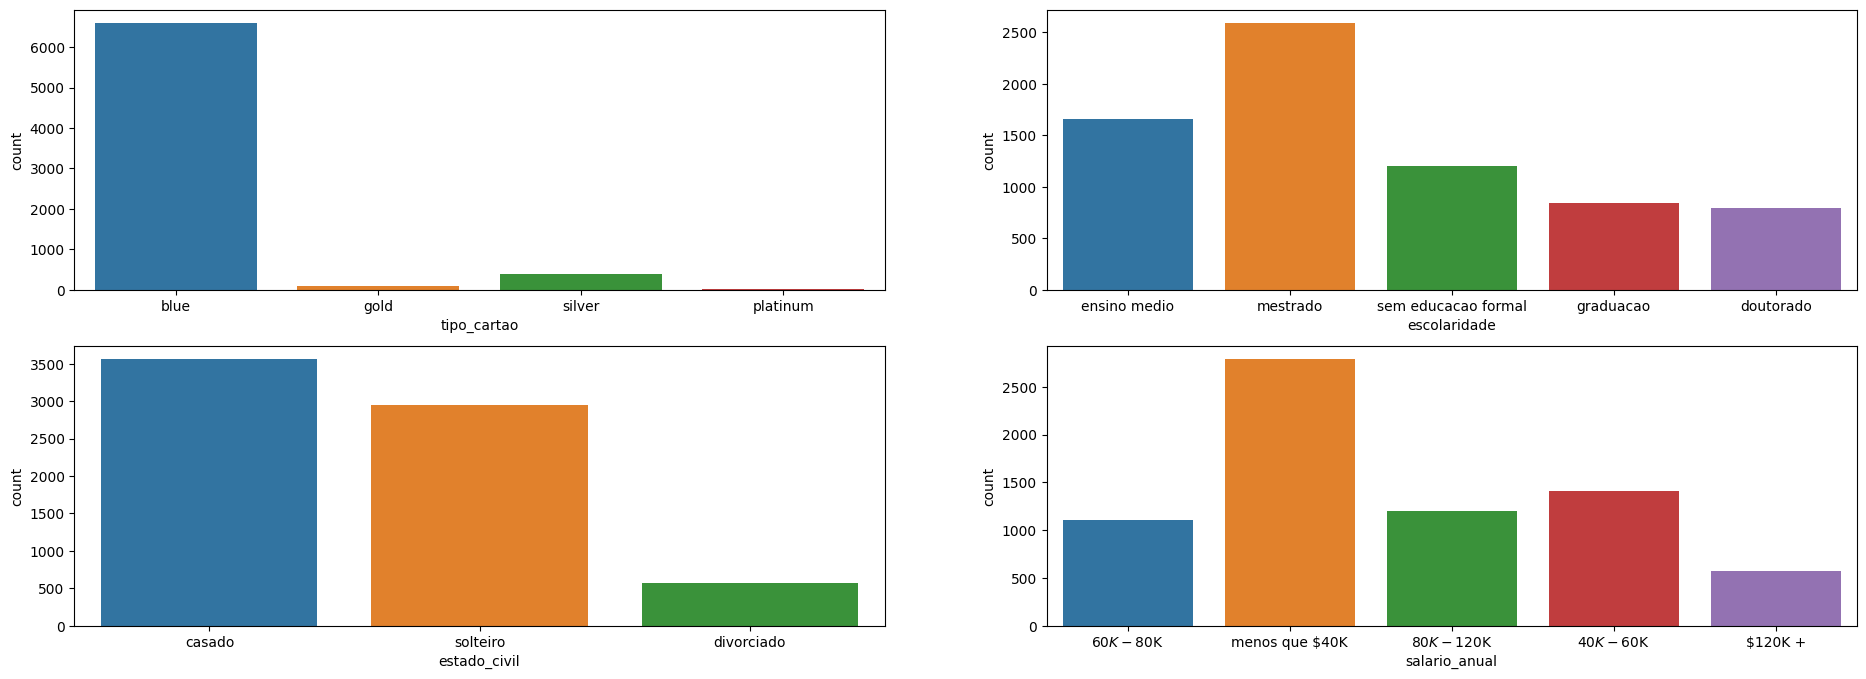

In [33]:
plt.close('all')
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='tipo_cartao', data=df)
sns.countplot(ax = axes[0, 1], x='escolaridade', data=df)
sns.countplot(ax = axes[1, 0], x='estado_civil', data=df)
sns.countplot(ax = axes[1, 1], x='salario_anual', data=df)	


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sexo', ylabel='count'>

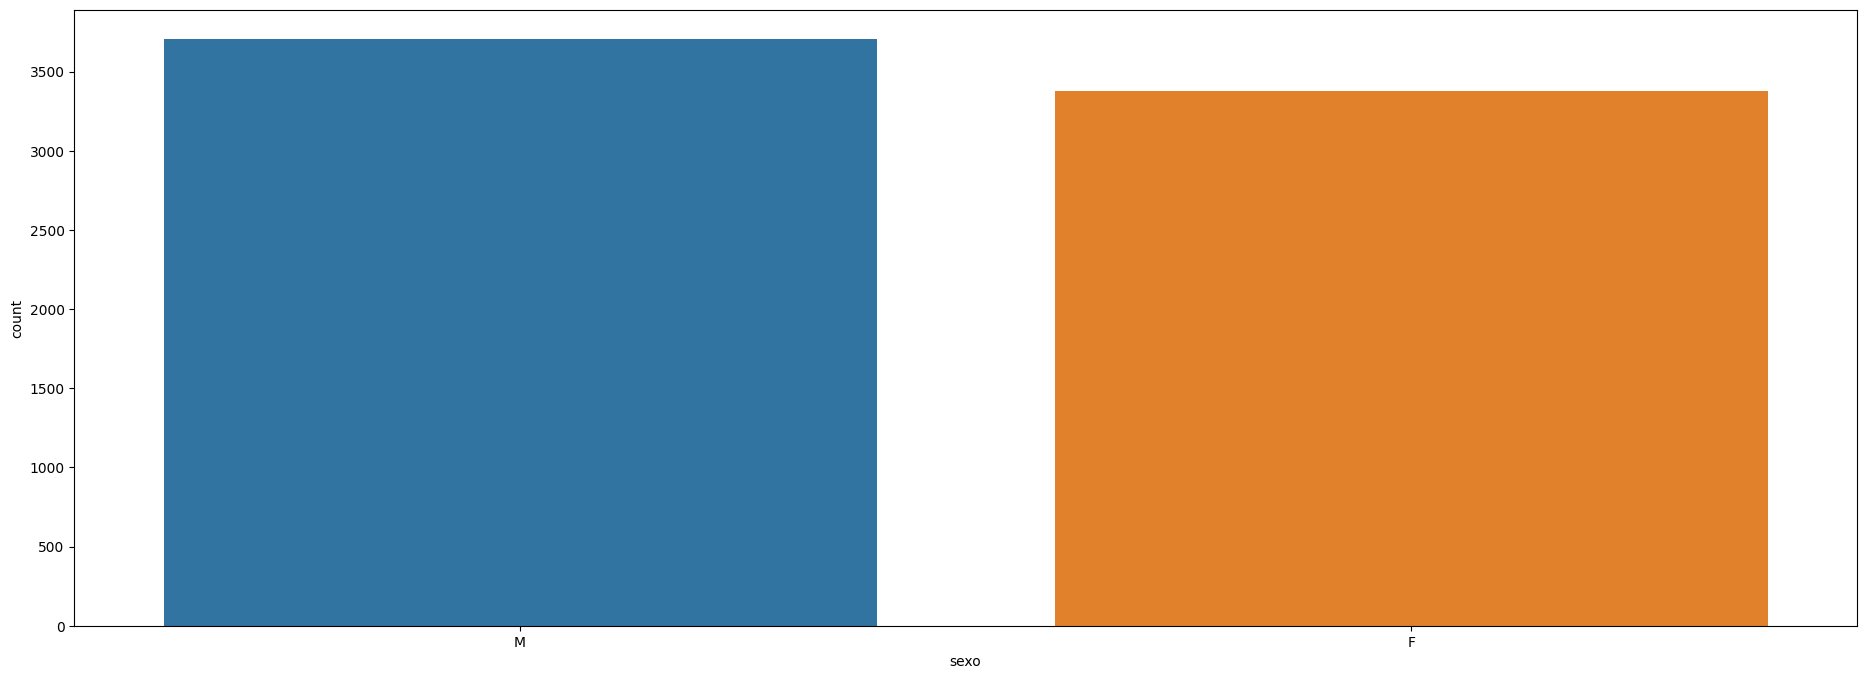

In [34]:
sns.countplot(x='sexo', data=df)

 - Atributos **numéricos**.

In [35]:
df_categoricos = df.select_dtypes('number')
df_categoricos

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,3,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,5,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,3,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,3,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,2,36,3,2,1,4010.69,1088.07,24
...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,0,54,1,34,5,0,2,13940.62,15577.67,114
10121,713899383,0,56,1,50,4,4,1,3688.95,14596.49,120
10122,772366833,0,50,2,40,3,3,2,4003.91,15476.26,117
10124,716506083,1,44,1,36,5,4,3,5409.16,10291.78,60


In [36]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


In [37]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 84.28%
A proporcão clientes inadimplentes é de 15.72%


In [38]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

 - Quantidade de Transações nos Últimos 12 Meses

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Soldado\AppData\Local\Temp\ipykernel_13216\3045762736.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
 

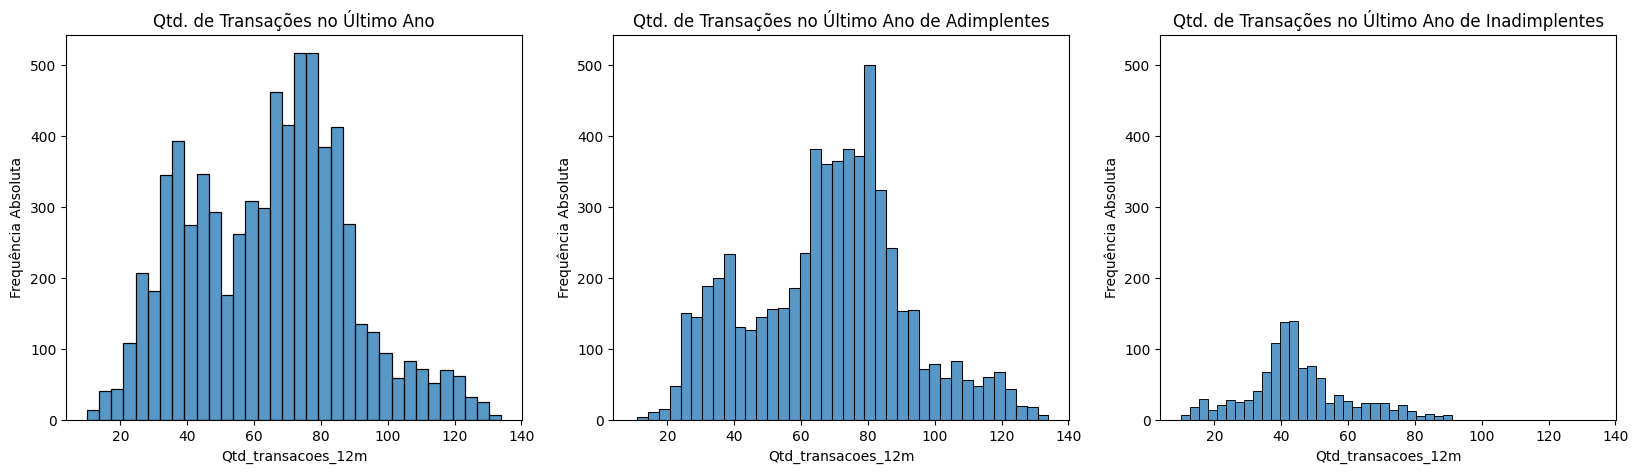

In [39]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Valor das Transações nos Últimos 12 Meses

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Soldado\AppData\Local\Temp\ipykernel_13216\3932491844.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
 

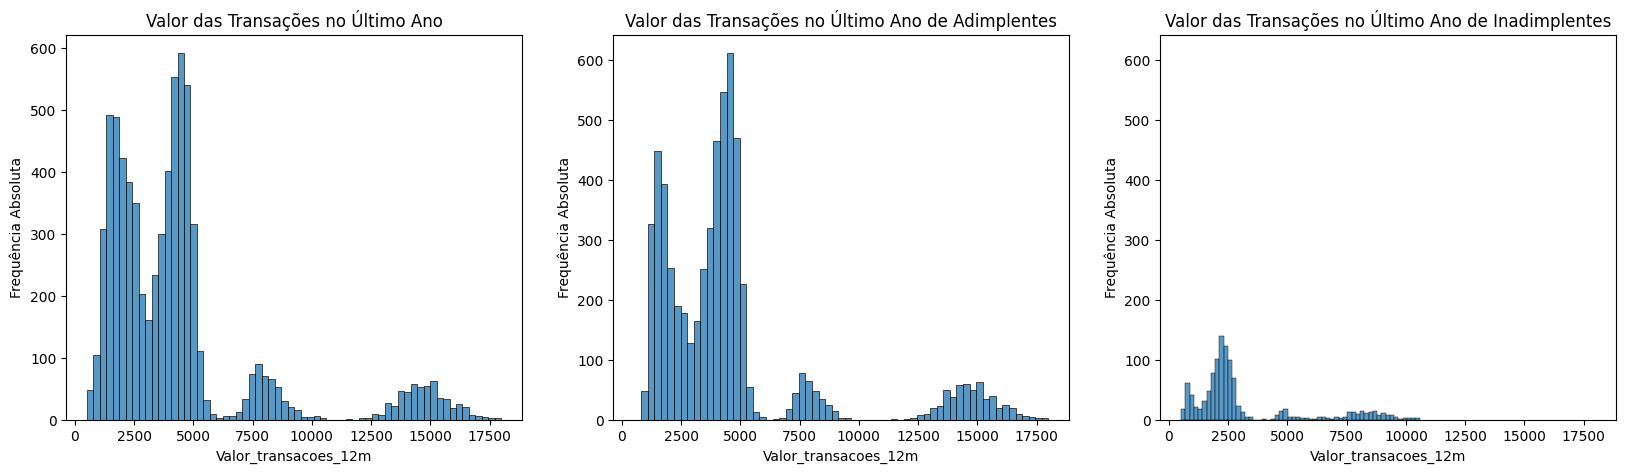

In [40]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>